# EDA

## Resize images

In [1]:
import os
import os.path   # To check if the cover image file exists

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.misc import imread, imresize, imshow
import numpy as np
from time import time

from PIL import Image # To resize the cover images.

# from hashlib import md5
# import glob # grab only jpegs
import warnings
warnings.filterwarnings('ignore')

from myfunk import *

%matplotlib inline

Using TensorFlow backend.


In [4]:
from pylab import rcParams
plt_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[10.0,5.0],
              'axes.labelsize':20,
              'axes.titlesize':20,
              'lines.linewidth':3, 
              'legend.fontsize':28}
sns.set(style="darkgrid", color_codes=True)
plt.rcParams.update(plt_update)

sns.set_style('whitegrid')

In [9]:
project_name = 'book_cover_recommender'

if not os.getcwd().endswith(project_name):
    try: 
        ind = os.getcwd().index(project_name)
        idx = len(os.getcwd()) - (ind+len(project_name))
        path = os.getcwd()[:-idx]
        print(path)
        os.chdir(path)
    except:
        print('{} not found in path'.format(project_name))
else: 
    path = os.getcwd()
    print(path)

pth = "/Users/iZbra1/Documents/K2DS/Projects/book_cover_recommender/data/raw/covers/"

# Variables
image_files = [f for f in glob.glob(path+"/data/raw/covers/*.jpg")]
print(len(image_files))

data = pd.read_csv(path+"/data/interim/books.csv", index_col=0)
print(data.shape)
data.head(2)

/Users/iZbra1/Documents/K2DS/Projects/book_cover_recommender
5836
(5836, 9)


,isbn,authors,year,title,cover,avg_rating,tot_rating,height,width
book_id,,,,,,,,,
1,439023483,suzanne collins,2008,the hunger games the hunger games 1,the hunger games the hunger games 1 by suzanne...,4.279707,22806,146,98
2,439554934,jk rowling mary grandpre,1997,harry potter and the sorcerers stone harry pot...,harry potter and the sorcerers stone harry pot...,4.351350,21850,147,98


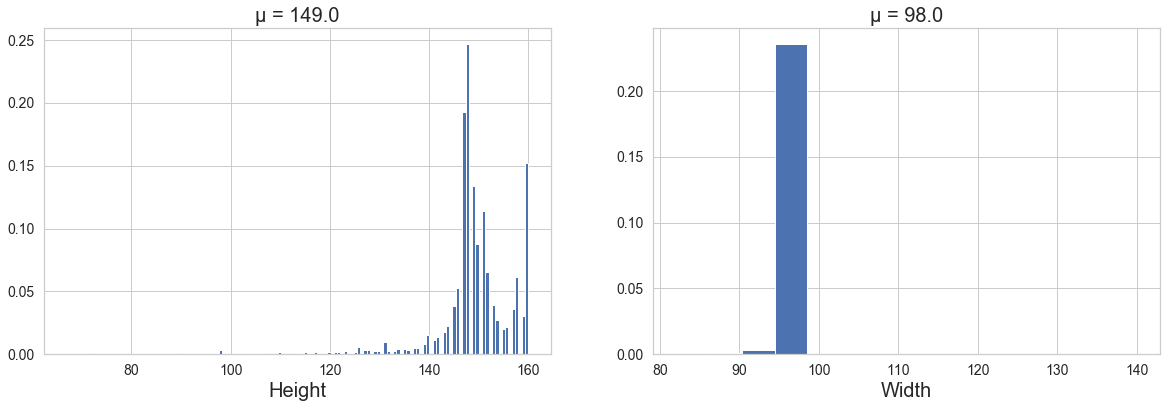

In [10]:
# Check the size of the cover images
# create 2 subplots (vertically stacked)
f, axarr = plt.subplots(1,2,figsize=(20,6))
# plot hist of sample means for first var on the top subplot
axarr[0].hist(data['height'],normed=True, bins='auto')
# plot hist of sample means for second var on the top subplot
axarr[1].hist(data['width'],normed=True,bins='auto')
axarr[1].set(xlabel = 'Width', title = "µ = "+ str(round(data.width.mean(),0)))

axarr[0].set(title="µ = " + str(round(data.height.mean(),0)),
       xlabel="Height")

plt.show()

the following code might not be necessary. Images can be resized prior to being analized. 

In [6]:
pth

'/Users/iZbra1/Documents/K2DS/Projects/book_cover_recommender/data/raw/covers/'

In [13]:
# Move cover images to processed folder
os.chdir(pth)
# Resizing to 149x98
cover_resize(image_files, width=98, height=149)
# Update the changes in the dataframe
data.height = 149
data.width = 98


In [14]:
data.head()

,isbn,authors,year,title,cover,avg_rating,tot_rating,height,width
book_id,,,,,,,,,
1,439023483,suzanne collins,2008,the hunger games the hunger games 1,the hunger games the hunger games 1 by suzanne...,4.279707,22806,149,98
2,439554934,jk rowling mary grandpre,1997,harry potter and the sorcerers stone harry pot...,harry potter and the sorcerers stone harry pot...,4.351350,21850,149,98
3,316015849,stephenie meyer,2005,twilight twilight 1,twilight twilight 1 by stephenie meyer.jpg,3.214341,16931,149,98
4,61120081,harper lee,1960,to kill a mockingbird,to kill a mockingbird by harper lee.jpg,4.329369,19088,149,98
5,743273567,f scott fitzgerald,1925,the great gatsby,the great gatsby by f scott fitzgerald.jpg,3.772224,16604,149,98


In [15]:
# Save to processing storage
data.to_csv(path+"/data/processed/books.csv")